In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    
        fitted = tx @ w
        n = y.shape[0]
        return 1/(2*n) * ((y-fitted)**2).sum()


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for j in range(len(w0)):
        for i in range(len(w1)):
            weight = np.array([w0[j], w1[i]])
            losses[j,i] = compute_loss(y, tx, weight)
   
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.004 seconds


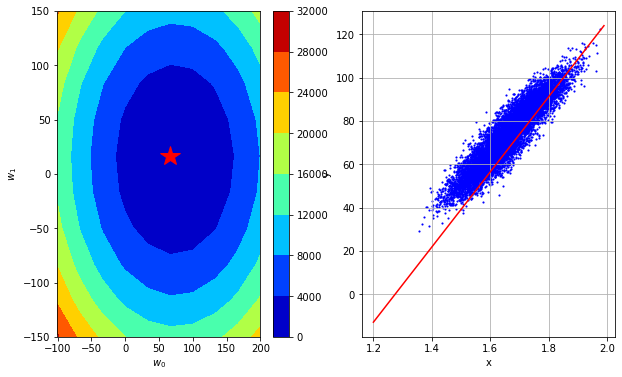

In [9]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [10]:
def compute_gradient(y, tx, w):
    
    fitted = tx @ w
    e = y - fitted
    n = fitted.shape[0]
    gradient = -1/n  * tx.transpose() @ e
    return gradient 
    
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    
compute_gradient(y, tx, np.array([2,1]).transpose())

array([-71.293922  , -12.47971243])

Please fill in the functions `gradient_descent` below:

In [11]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        loss = compute_loss(y,tx, w)
        gradient = compute_gradient(y,tx, w)
        w = w - gradient * gamma 
       
        # store w and loss
        ws.append(w)
        losses.append(loss)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
         #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [14]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.3

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
#print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [16]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    fitted = tx @ w
    e = y - fitted
    n = fitted.shape[0]
    gradient = -1/n  * tx.transpose() @ e
    return gradient 
    
from helpers import batch_iter

def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for yb, txb in batch_iter(y,tx, batch_size, int(len(y)/batch_size)):
            loss = compute_loss(yb,txb, w)
            gradient = compute_stoch_gradient(yb, txb, w)
            w = w - gradient * gamma
            ws.append(w)
            losses.append(loss)
            
          #  print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
           #   bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [17]:
# from stochastic_gradient_descent import *
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.3
batch_size = 5
print("num batch ", int(len(y)/batch_size))
# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
#print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

num batch  2000


In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=100001, min=1), Output()), _dom_classes=('w…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [19]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


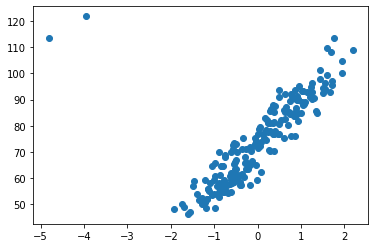

In [20]:
#plot the data 
import matplotlib.pyplot as plt 
plt.scatter(tx[:,1], y, marker = "o")
plt.show()

SGD: execution time=0.021 seconds


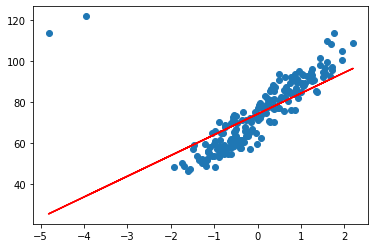

In [30]:
#calculate w0 and w1 as before and plot it together with the data 

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.3
batch_size = 5

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

#line that we obtain
final_w0, final_w1 = sgd_ws[-1][0], sgd_ws[-1][1]
line = [final_w0 + final_w1*x for x in tx[:,1]]
#plotting the data 
plt.scatter(tx[:,1], y, marker = "o")
plt.plot(tx[:,1], line, color = "red")
plt.show()

Gradient Descent: execution time=0.011 seconds


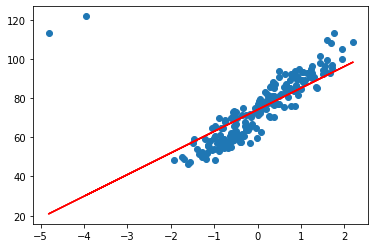

In [52]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 400
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))


#line that we obtain
final_w0, final_w1 = gradient_ws[-1][0], gradient_ws[-1][1]
line = [final_w0 + final_w1*x for x in tx[:,1]]
#plotting the data 
plt.scatter(tx[:,1], y, marker = "o")
plt.plot(tx[:,1], line, color = "red")
plt.show()

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [48]:
#let's try mae
def compute_loss_mae(y, tx, w):
        fitted = tx @ w
        n = y.shape[0]
        return 1/n * np.absolute(y-fitted).sum()
    
def compute_stoch_gradient_mae(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    fitted = tx @ w
    e = y - fitted
    n = fitted.shape[0]
    one_minus_one = (e>0)*1 + (e<0)*(-1) + (e==0)*0
    gradient = -1/n  * (tx.transpose() @ one_minus_one)
    
    return gradient

                           


def stochastic_gradient_descent_mae(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
          for yb, txb in batch_iter(y,tx, batch_size, int(len(y)/batch_size)):
            loss = compute_loss_mae(yb,txb, w)
            gradient = compute_stoch_gradient_mae(yb, txb, w)
            w = w - gradient * gamma
            ws.append(w)
            losses.append(loss)
            
          #  print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
           #   bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))


    return losses, ws



#please do the same also for the function gradient descent and compute_gradient_descent 
#implenenting it also for the MAE loss function 
#for the moment only the stochastic gradient descent optimization algorithm has been implemented 


def compute_gradient_mae(y, tx, w):
    
    fitted = tx @ w
    e = y - fitted
    n = fitted.shape[0]
    one_minus_one = (e>0)*1 + (e<0)*(-1) + (e==0)*0
    gradient = -1/n  * (tx.transpose() @ one_minus_one)
    
    return gradient


def gradient_descent_mae(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        
        loss = compute_loss_mae(y,tx, w)
        gradient = compute_gradient_mae(y,tx, w)
        w = w - gradient * gamma 
        ws.append(w)
        losses.append(loss)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
         #     bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws




SGD: execution time=0.011 seconds


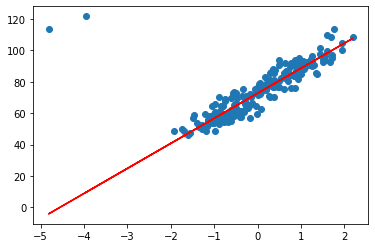

In [49]:
#calculate w0 and w1 as before and plot it together with the data 

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.3
batch_size = 20


# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent_mae(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

#line that we obtain
final_w0, final_w1 = sgd_ws[-1][0], sgd_ws[-1][1]
line = [final_w0 + final_w1*x for x in tx[:,1]]
#plotting the data 
plt.scatter(tx[:,1], y, marker = "o")
plt.plot(tx[:,1], line, color = "red")
plt.show()

Gradient Descent: execution time=0.010 seconds


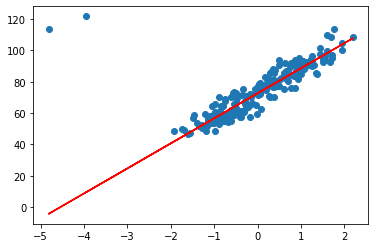

In [51]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 400
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent_mae(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))


#line that we obtain
final_w0, final_w1 = gradient_ws[-1][0], gradient_ws[-1][1]
line = [final_w0 + final_w1*x for x in tx[:,1]]
#plotting the data 
plt.scatter(tx[:,1], y, marker = "o")
plt.plot(tx[:,1], line, color = "red")
plt.show()